In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datasets/process_data.csv')
df.head()

,Unnamed: 0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,spam
0,0,-1.367748,-0.599342,-0.070820,0.067728,-0.040300,-0.435577,0.143873,-0.580557,-0.091955,0.018520,1
1,1,-1.613224,-0.465478,0.515957,-0.165556,0.176729,-0.580288,0.798677,-1.070476,-0.145715,0.010262,1
2,2,-1.124609,-0.731933,-0.652013,0.298791,-0.255265,-0.292243,-0.504699,-0.095300,-0.038707,0.026699,1
3,3,-3.571623,6.708846,-1.631887,-0.504146,0.020093,0.615708,0.823889,-0.669833,7.997988,0.272626,1
4,4,-2.716155,-0.528685,4.983744,-1.922375,-2.946816,1.479541,0.089738,0.659221,0.242865,-0.023650,1


In [3]:
df=df.drop(df.columns[0],axis=1)
df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,spam
0,-1.367748,-0.599342,-0.070820,0.067728,-0.040300,-0.435577,0.143873,-0.580557,-0.091955,0.018520,1
1,-1.613224,-0.465478,0.515957,-0.165556,0.176729,-0.580288,0.798677,-1.070476,-0.145715,0.010262,1
2,-1.124609,-0.731933,-0.652013,0.298791,-0.255265,-0.292243,-0.504699,-0.095300,-0.038707,0.026699,1
3,-3.571623,6.708846,-1.631887,-0.504146,0.020093,0.615708,0.823889,-0.669833,7.997988,0.272626,1
4,-2.716155,-0.528685,4.983744,-1.922375,-2.946816,1.479541,0.089738,0.659221,0.242865,-0.023650,1


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score

X=df.drop('spam',axis=1)
y=df['spam']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=RandomForestClassifier()
model.fit(X_train,y_train)

y_predict=model.predict(X_test)
y_pred_train=model.predict(X_train)
print()
print(classification_report(y_test,y_predict))
print("testing accuracy",accuracy_score(y_test,y_predict))
print("traing accuracy",accuracy_score(y_train,y_pred_train))



              precision    recall  f1-score   support

           0       0.92      0.96      0.94       856
           1       0.88      0.77      0.82       290

    accuracy                           0.92      1146
   macro avg       0.90      0.87      0.88      1146
weighted avg       0.91      0.92      0.91      1146

testing accuracy 0.9153577661431065
traing accuracy 0.9762112614578786


In [10]:
somete_tomek=SMOTETomek(random_state=42)
x_resample,y_resample=somete_tomek.fit_resample(X_train,y_train)
model.fit(x_resample,y_resample)
y_predict_re=model.predict(X_test)
y_pred_train2=model.predict(x_resample)
print(classification_report(y_test,y_predict))
print("testing accuracy",accuracy_score(y_test,y_predict))
print("traing accuracy",accuracy_score(y_resample,y_pred_train2))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       856
           1       0.88      0.77      0.82       290

    accuracy                           0.92      1146
   macro avg       0.90      0.87      0.88      1146
weighted avg       0.91      0.92      0.91      1146

testing accuracy 0.9153577661431065
traing accuracy 0.9690316952602501


In [12]:
from imblearn.over_sampling import SMOTE
somete=SMOTE(random_state=42)
x_resample1,y_resample2=somete.fit_resample(X_train,y_train)
model.fit(x_resample1,y_resample2)
y_predict_re=model.predict(X_test)
y_pred_train2=model.predict(x_resample1)
print(classification_report(y_test,y_predict))
print("testing accuracy",accuracy_score(y_test,y_predict))
print("traing accuracy",accuracy_score(y_resample2,y_pred_train2))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       856
           1       0.88      0.77      0.82       290

    accuracy                           0.92      1146
   macro avg       0.90      0.87      0.88      1146
weighted avg       0.91      0.92      0.91      1146

testing accuracy 0.9153577661431065
traing accuracy 0.9696061643835616


In [16]:
from sklearn.model_selection import GridSearchCV, train_test_split,StratifiedKFold,cross_val_predict
from sklearn.ensemble import RandomForestClassifier


from collections import Counter


X = df.drop(["spam"], axis=1)
Y = df["spam"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)


smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)
print("Class distribution after SMOTETomek:", Counter(y_train_resampled))


rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200, 250, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [5, 10, 15],
    'max_features': ['sqrt', 'log2'],
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train_resampled, y_train_resampled)


print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train_resampled)
y_val_pred = best_model.predict(X_test)

training_accuracy = accuracy_score(y_train_resampled, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_val_pred)

print(f"Training Accuracy: {training_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {testing_accuracy * 100:.2f}%")

Class distribution after SMOTETomek: Counter({0: 3424, 1: 3424})
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 250}
Training Accuracy: 95.36%
Validation Accuracy: 90.40%


[[771 101]
 [  9 265]]


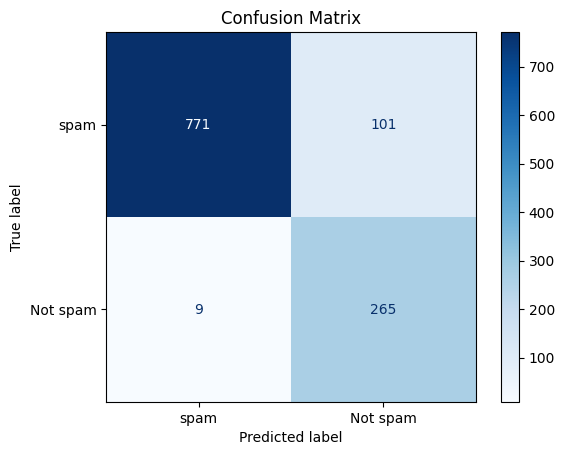

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print(confusion_matrix(y_test, y_val_pred))
labels = ["spam", "Not spam"]
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_val_pred),display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()